## Table of content
### Importing libraries
### Importing data
### Data preprocessing
### Time series analysis: decomposition
### Testing for stationarity

### Importing libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

### Importing data

In [2]:
# Creating path

path = r"C:\Users\tseki\OneDrive\Documents\Careerfoundry\Data immersion\Achievement 6"

In [3]:
data = pd.read_csv(os.path.join(path, 'Data', 'Prepared', 'data_merge.csv'), index_col = [0])

In [4]:
data.head()

,price,bed,bath,acre_lot,city,zip_code,house_size,sold_date,county
0,525000.0,3.0,3.0,0.45,Agawam,1001.0,2314.0,2014-06-25,Hampden
1,289900.0,3.0,2.0,0.36,Agawam,1001.0,1276.0,2012-10-12,Hampden
2,384900.0,3.0,2.0,0.46,Agawam,1001.0,1476.0,1986-11-20,Hampden
3,199999.0,3.0,2.0,1.76,Agawam,1001.0,1968.0,2008-09-19,Hampden
4,419000.0,4.0,2.0,2.00,Pelham,1002.0,1607.0,2005-07-25,Hampshire


### Data preprocessing

In [6]:
# dropping irrelevant columns

data1 = data.drop(columns = ['bed', 'bath', 'acre_lot', 'city', 'zip_code', 'house_size', 'county'])

In [7]:
data1.head()

,price,sold_date
0,525000.0,2014-06-25
1,289900.0,2012-10-12
2,384900.0,1986-11-20
3,199999.0,2008-09-19
4,419000.0,2005-07-25


In [8]:
data1.dtypes

price        float64
sold_date     object
dtype: object

In [9]:
# convert sold_date column to datetime datatype

data1['sold_date'] = pd.to_datetime(data1['sold_date'])

In [10]:
data1.dtypes

price               float64
sold_date    datetime64[ns]
dtype: object

In [11]:
data2 = data1.set_index('sold_date') # Set the sold date column as the index of the dataframe.

In [12]:
data2.head()

,price
sold_date,
2014-06-25,525000.0
2012-10-12,289900.0
1986-11-20,384900.0
2008-09-19,199999.0
2005-07-25,419000.0


In [14]:
# sorting values in ascending order

data2.sort_values(by=['sold_date'], inplace=True)

In [24]:
data2.tail(20)

,price
sold_date,
2022-02-14,499000.0
2022-02-15,2950000.0
2022-03-07,444000.0
2022-03-09,449000.0
2022-03-18,399000.0
2022-03-23,628400.0
2022-04-15,2495000.0
2022-04-26,4649000.0
2022-04-29,3800000.0


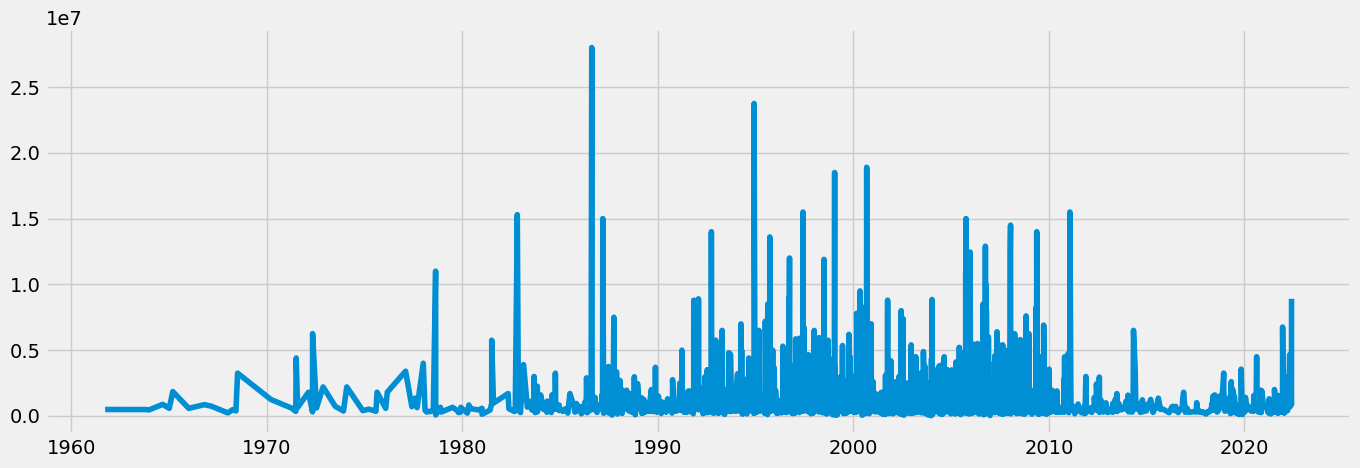

In [15]:
# Plotting a line chart of the data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data2)

### Time series analysis: decomposition

In [42]:
# Decompose the time series using an additive model (specifying period)

decomposition = sm.tsa.seasonal_decompose(data2, model='multiplicative', period = int(len(data2)/2))

In [20]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

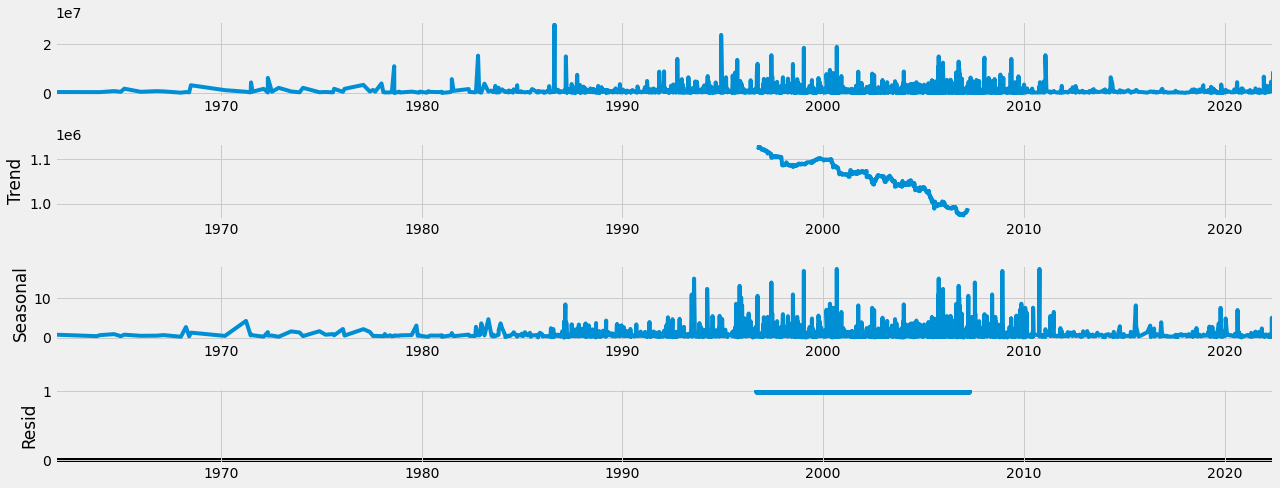

In [43]:
# plotting the separate components 

decomposition.plot()
plt.show()

### Testing for stationarity

In [53]:
# Null hypothesis: the data is non-stationary (assumes the presence of a unit root)
# alternative hypothesis is that the data is stationary

# We want to reject the null hypothesis, to do this test statistic must be smaller than the critical value at the choosen CL(5%)
# Which implies that the data is stationary and we can proceed with the forcast. Otherwise, we would have to staionarized the
# data and run dickey-duller test again.
# Also the p-value must be less than 0.05(the significance level) to be able to reject the null hypothesis.


# In summary, When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that 
# the time series is stationary.

In [44]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data2['price'])

Dickey-Fuller Stationarity test:
Test Statistic                  -53.877999
p-value                           0.000000
Number of Lags Used               0.000000
Number of Observations Used    3047.000000
Critical Value (1%)              -3.432498
Critical Value (5%)              -2.862489
Critical Value (10%)             -2.567275
dtype: float64


#### Success! the test statistics is less than the critical value, and the p-value is less than 0.05, we can safely reject the null hypothesis, this means that our data is stationary and we can proceed with forcasting.

#### Checking for autocorrelation

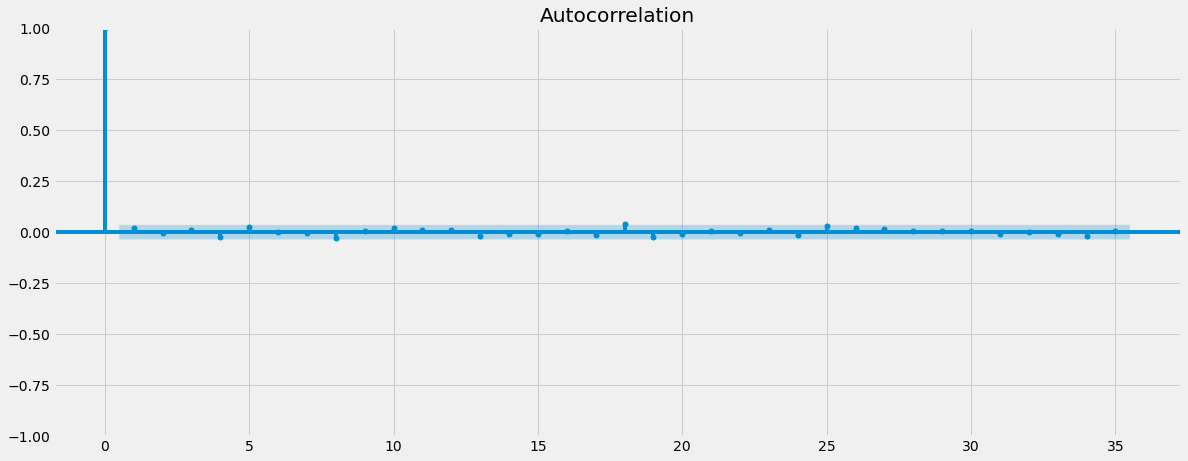

In [46]:
# autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data2)
plt.show()